In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score,ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB

In [3]:
dataframe = pd.read_csv('Iris.csv')

In [4]:
dataframe.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataframe.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
dataframe = dataframe.drop(['Id'],axis=1)

In [7]:
#seaprate out the target and feature variables or independent and dependent variables
X = dataframe.drop(['Species'], axis = 1)
y = dataframe['Species']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [9]:
#creating model and fitting logisticregression to training set
naiveBayse = GaussianNB()
naiveBayse.fit(X_train, y_train)

GaussianNB()

In [10]:
y_pred = naiveBayse.predict(X_test)
print(y_pred)

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa']


In [11]:
#actual vs predicted value side by side
y_compare = np.vstack((y_test, y_pred)).T
print("actual value Vs predicted values")
print(y_compare)

actual value Vs predicted values
[['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-

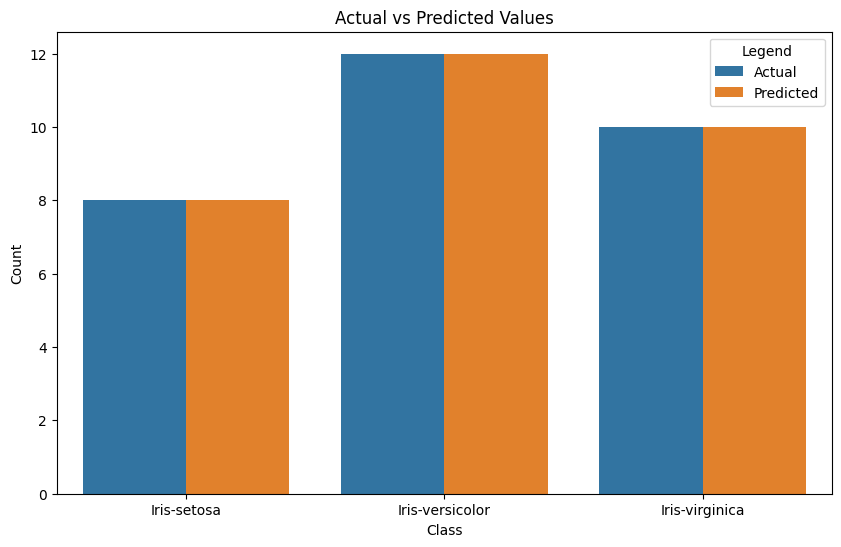

In [14]:
# Plot counts of actual and predicted values
import seaborn as sns
df_visualization = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.figure(figsize=(10, 6))
sns.countplot(x='value', hue='variable', data=pd.melt(df_visualization))
plt.title('Actual vs Predicted Values')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Legend', loc='upper right', labels=['Actual', 'Predicted'])
plt.show()

In [15]:
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8666666666666667


Confusion Matrix:
[[ 8  0  0]
 [ 0 10  2]
 [ 0  2  8]]


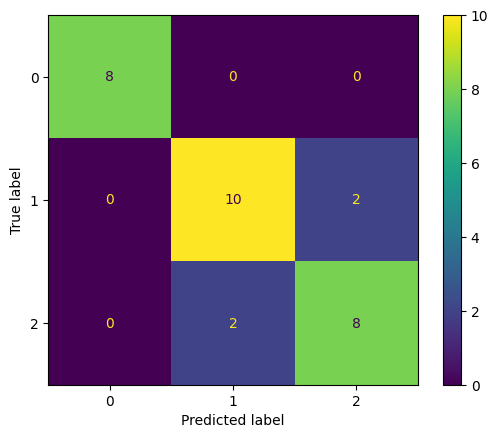

In [16]:
# Making the Confusion Matrix
#In a multiclass scenario, the confusion matrix will have rows and columns corresponding to each class, 
#and the diagonal elements represent the true positives for each class.

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
print("Confusion Matrix:")
print(cm)
disp.plot()
plt.show()


In [17]:
# Extract TP, FP, FN, TN for each class
classes = ['iris-versicolor', 'iris-setosa', 'iris-versicolor']
classes = sorted(set(y_test))

for i, class_label in enumerate(classes):
    TP = cm[i, i]
    FP = sum(cm[:, i]) - TP
    FN = sum(cm[i, :]) - TP
    TN = sum(sum(cm)) - TP - FP - FN
    
    print(f"\nClass: {class_label}")
    print('True Positives (TP): ', TP)
    # print('True Negatives (TN): ', TN)
    print('False Positives (FP): ', FP)
    print('False Negatives (FN): ', FN)

    accuracy_class = (TP + TN) / (TP + TN + FP + FN)
    error_rate_class = (FP + FN) / (TP + TN + FP + FN)
    precision_class = TP / (TP + FP)
    recall_class = TP / (TP + FN)

    print("Accuracy:", accuracy_class)
    print("Error Rate:", error_rate_class)
    print("Precision:", precision_class)
    print("Recall:", recall_class)


Class: Iris-setosa
True Positives (TP):  8
False Positives (FP):  0
False Negatives (FN):  0
Accuracy: 1.0
Error Rate: 0.0
Precision: 1.0
Recall: 1.0

Class: Iris-versicolor
True Positives (TP):  10
False Positives (FP):  2
False Negatives (FN):  2
Accuracy: 0.8666666666666667
Error Rate: 0.13333333333333333
Precision: 0.8333333333333334
Recall: 0.8333333333333334

Class: Iris-virginica
True Positives (TP):  8
False Positives (FP):  2
False Negatives (FN):  2
Accuracy: 0.8666666666666667
Error Rate: 0.13333333333333333
Precision: 0.8
Recall: 0.8
